<h1>Computer Vision Problem</h1>

<h3>Instructions</h3>
<ul>
<li>This dataset has 4 classes. Labels for training data are provided, you have to submit labels of test data. Feel free to use any Machine learning or Deep learning technique.</li>
<li>In the form, you would have to submit the CSV file of test labels. CSV file should be named as your_full_name.csv each row of this file should be the following:- Test_image_index, predicted class</li>    
<li> Dataset folder has a sample submission file. Strictly follow that format(Follow the exact format. Make sure case and the name of headers are same. No extra index columns).Your GitHub repo should have code in Jupyter notebook.</li>    
</ul>
<hr />

<h3>Solution</h3>
<h4>I have used the following models for the CV task in the order listed below:</h4>
<ul>
    <li> Machine Learning Techniques </li>
    <ul>
    <li>KNN: Used just for the sake of seeing the accuracy. In fact gives good performance on validation set</li>
    <li>SVM: </li>
    <li>logistic regression</li>
    </ul>
    <li> Deep Learning models </li>
    <ul><li>CNN</li></ul>
</ul>

### OVERALL CNN'S GAVE THE BEST PERFORMANCE WITH ACCURACY OF NEARLY 93 ON VALIDATION SET

In [40]:
# Importing the necessary libraries for completing the task

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as knn
import warnings 
import pickle as pk
%matplotlib inline

warnings.filterwarnings('ignore')

### 1. Loading and Basic preprocessing on the dataset before any algorithm

In [41]:
# loading pickle file
with open('./train_image.pkl', 'rb') as f:
    train_x = np.array(pk.load(f),dtype=np.float32)
with open('./train_label.pkl', 'rb') as f:
    train_y =np.array(pk.load(f),dtype=np.float32)
with open('./test_image.pkl', 'rb') as f:
    test_x =np.array(pk.load(f),dtype=np.float32)

# printing dimentions of given data
print(train_y.shape)
print(train_x.shape)
print(test_x.shape)

(8000,)
(8000, 784)
(2000, 784)


### Visualization

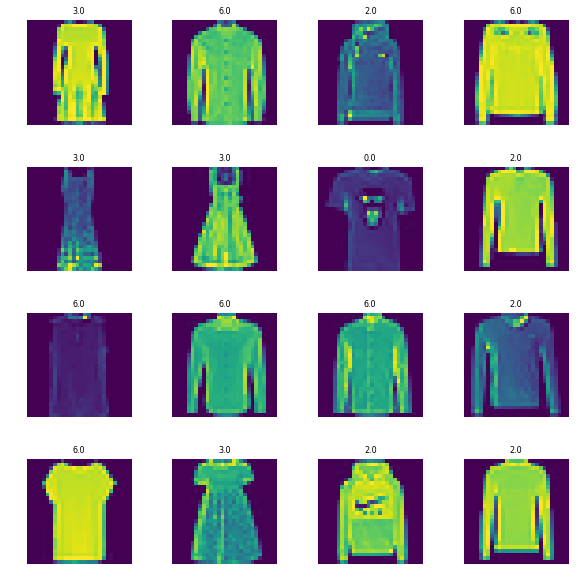

In [42]:
# visualization in grid form
width = 4
length = 4

# fig, axes = plt.subplots(length, width)

# axis is used to plot an image at a given location
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel() 

# number of images
number_img = len(train_x)

# Select a random number from 0 to number_img and display it in ith plot 
for i in np.arange(0, length*width): 

    # random number selector
    index = np.random.randint(0, number_img)
    
    # image reshaped into 28x28 for displaying
    axes[i].imshow( train_x[index,].reshape((28,28)) )
    axes[i].set_title(train_y[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

#### Normalization - min-max

In [43]:
train_x = train_x/255
test_x = test_x/255

#### data augmentation

#### Spliting into train and validate set

In [44]:
from sklearn.model_selection import train_test_split

# divided train and validate to 90% - 10% 
train_x, validate_x, train_y, validate_y = train_test_split(train_x, train_y, test_size = 0.1, random_state = 12345)
print(train_x.shape)
print(validate_x.shape)

(7200, 784)
(800, 784)


#### Algorithm 1: K Nearest Neighbors

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#weights = distance gave a slightly better predictions
#weights=['uniform','distance']

# to check optima; value of k --> k=3 gives best performance

"""
li=[]
for i in range(1,30):
    #initializing classifier
    classifier = KNeighborsClassifier(n_neighbors=i, weights='distance',algorithm='auto')
    classifier.fit(train_x,train_y)
    validate_predictions = classifier.predict(validate_x) # prediction on validate set
    li.append(sum(validate_predictions==validate_y))
print(li.index(max(li)))
plt.figure()
plt.plot(li)
"""

classifier = KNeighborsClassifier(n_neighbors=3, weights='distance',algorithm='auto')
classifier.fit(train_x,train_y)
validate_predictions = classifier.predict(validate_x)

print("Accuracy score: ",accuracy_score(validate_y,validate_predictions))

# default values for average is binary. Since it is a multiclass classification changes to weighted
print("F1 score: ",f1_score(validate_y,validate_predictions,average='weighted'))

Accuracy score:  0.80875
F1 score:  0.8066358656479798


#### Algorithm 2: SVM


In [65]:
from sklearn.svm import SVC

""" to check correct kernel --> rbf give best accuracy
ker = ['linear','poly','rbf','sigmoid']
for i in ker:
    classifier = SVC(gamma=0.1,kernel=i)
    classifier.fit(train_x,train_y)
    validate_predictions = classifier.predict(validate_x)
    print(sum(validate_predictions==validate_y))
"""

classifier = SVC(gamma=0.1,kernel='rbf')
classifier.fit(train_x,train_y)
validate_predictions = classifier.predict(validate_x)

print("Accuracy score: ",accuracy_score(validate_y,validate_predictions))

# default values for average is binary. Since it is a multiclass classification changes to weighted
print("F1 score: ",f1_score(validate_y,validate_predictions,average='weighted'))

Accuracy score:  0.82875
F1 score:  0.8301401435250247


#### Algorithm 3: Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

#solver=saga gives best performance
classifier = LogisticRegression(solver="saga",multi_class="multinomial")
classifier.fit(train_x,train_y)
validate_predictions = classifier.predict(validate_x)
print("Accuracy score: ",accuracy_score(validate_y,validate_predictions))


# default values for average is binary. Since it is a multiclass classification changes to weighted
print("F1 score: ",f1_score(validate_y,validate_predictions,average='weighted'))

Accuracy score:  0.79625
F1 score:  0.7947440153697813


#### Algorithm 4: CNN'S

In [71]:
# reshape data into (number of images,28,28,1)

train_x = train_x.reshape(train_x.shape[0], *(28, 28, 1))
test_x = test_x.reshape(test_x.shape[0], *(28, 28, 1))
validate_x = validate_x.reshape(validate_x.shape[0], *(28, 28, 1))

print(train_x.shape)

(7200, 28, 28, 1)


In [ ]:
# importing required libs

import random
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

#### architechture -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout layer -> Output

In [71]:
# constructing CNN
# drop=[0.1,0.3,0.25] #check different values

cnn_model = Sequential()

cnn_model.add(Conv2D(32,(5, 5), input_shape = (28,28,1), activation='relu'))
cnn_model.add(Conv2D(32,(5, 5), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64,(3, 3), activation='relu'))
cnn_model.add(Conv2D(64,(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(activation = 'relu', units=32))
#final layer
cnn_model.add(Dense(activation = 'softmax', units=10))

cnn_model.summary()

In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

# Setting learning rate annealer - helps to decreaase learning rate while training
# in this case checks validation accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
epochs = 40
batch_size=64

trained_model = cnn_model.fit(train_x,
                        train_y,
                        batch_size = batch_size,
                        epochs = epochs,
                        verbose = 2,
                        validation_data = (validate_x, validate_y), callbacks=[learning_rate_reduction])

In [ ]:
# applying model on test set
prediction = cnn_model.predict_classes(test_x)

In [ ]:
# to convert into csv file
# storing results into csv file
import xlsxwriter

workbook = xlsxwriter.Workbook('abhinav_nagpal.xlsx') 
worksheet = workbook.add_worksheet() 
for i in range(0,len(arr)):
    worksheet.write(i, 0, i) 
    worksheet.write(i,1,arr[i])
workbook.close()